In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('forestfires.csv')

In [14]:
df['output']=np.log(df['area']+1) #area is from 0 to 1090.84, -> log transform output

In [26]:
df=df.assign(Fire=lambda x: df['area']!=0) #new binary column, T: fire, F: no fire

In [114]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,output,Fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000,False
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000,False
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000,False
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000,False
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871,True
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592,True
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152,True
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,False


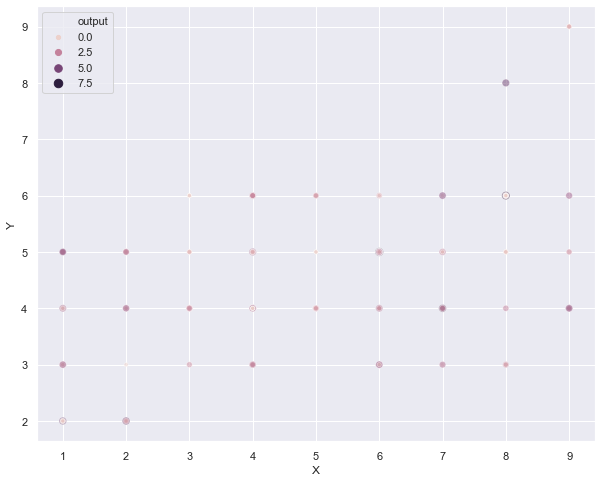

In [66]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(data=df, x='X',y='Y',hue='output',size='output',alpha=.5) #can roughly make out low risk areas

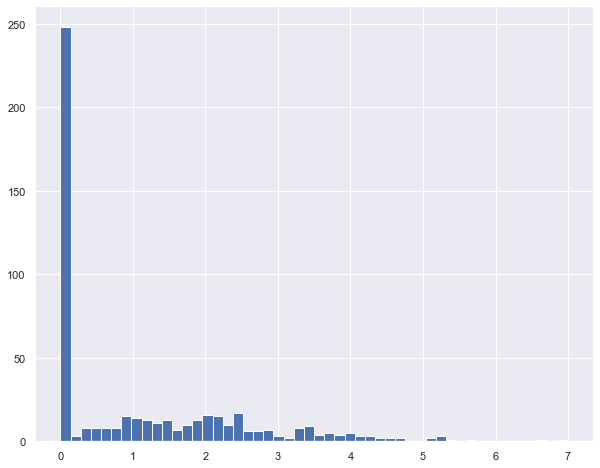

In [76]:
df['output'].hist(bins=50) #not exactly normally distributed

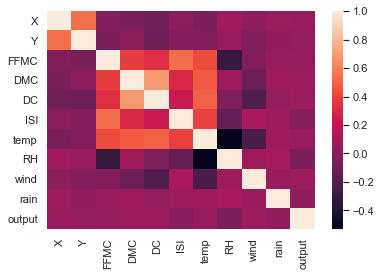

In [95]:
sns.heatmap(df.drop(['area','Fire'],axis=1).corr())

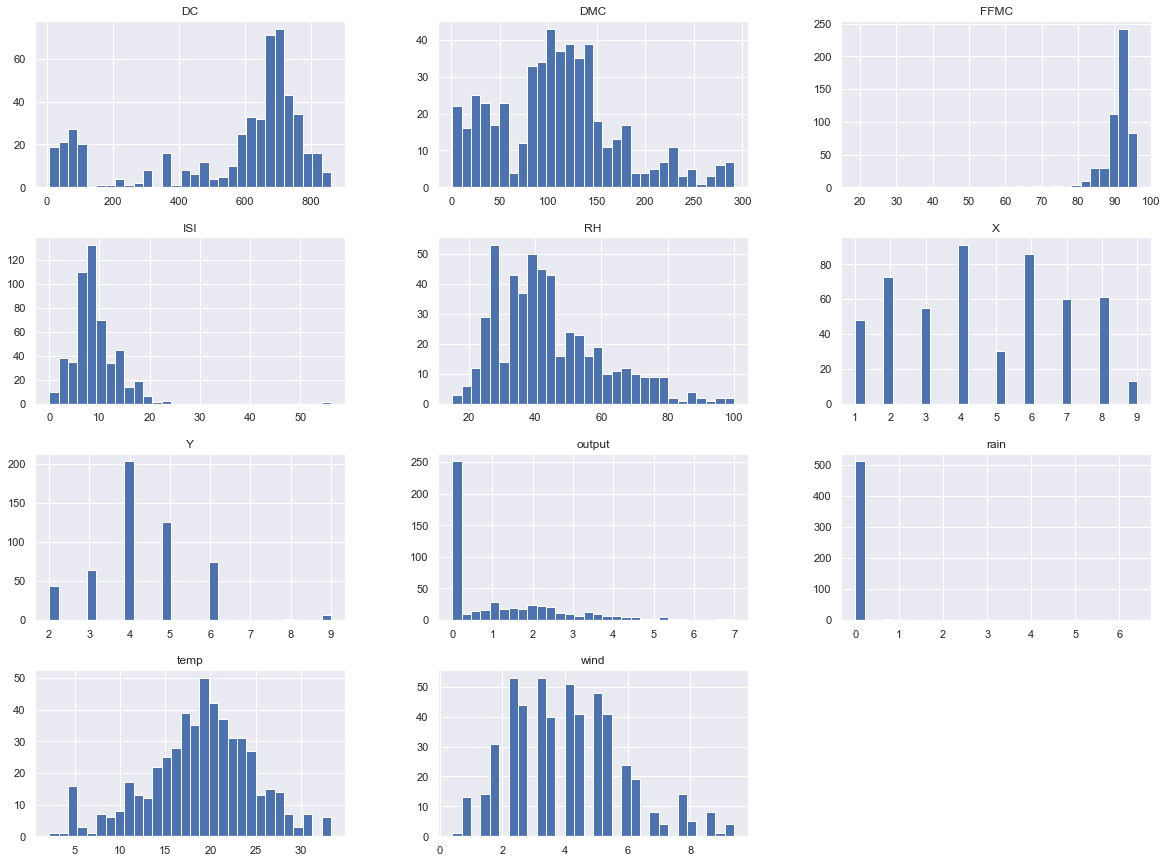

In [88]:
dfnum=df[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','output']]
dfnum.hist(bins=30,figsize=(20,15))
plt.show()

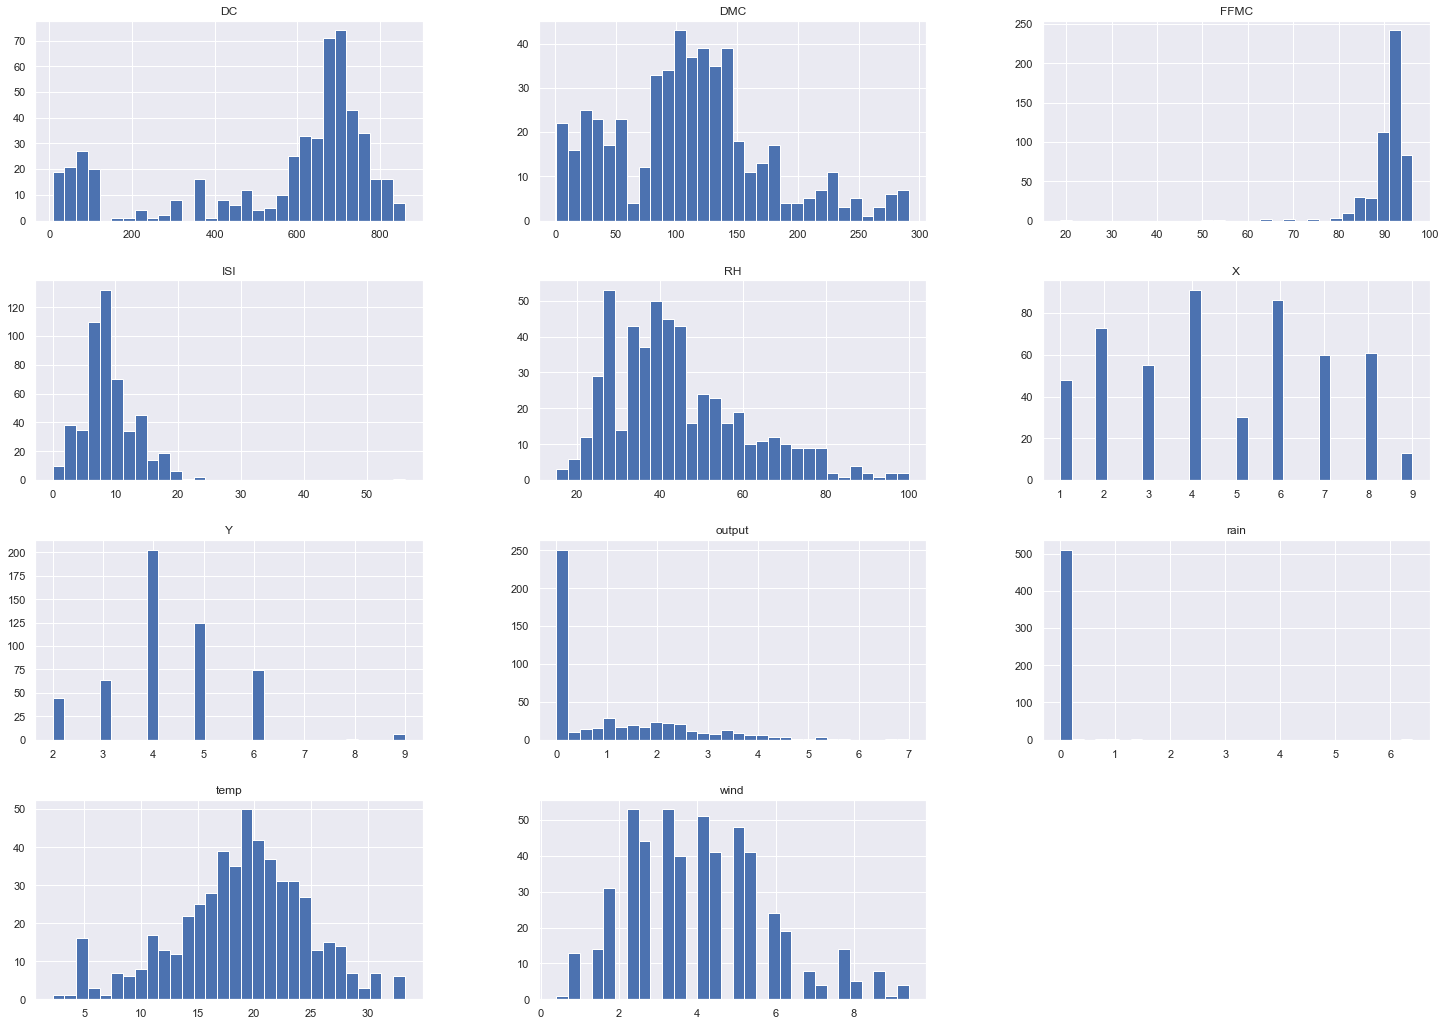

In [105]:
df.drop(['area','Fire'],axis=1).hist(bins=30,figsize=(25,18))
plt.show()

In [121]:
fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,output,Fire
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,0.307485,True
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,0.357674,True
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0.385262,True
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,0.438255,True
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,0.476234,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1.153732,True
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0.357674,True
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871,True
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592,True


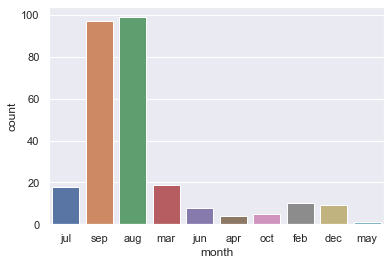

In [122]:
fires=df[df['Fire']==True]
sns.countplot(x='month',data=fires) #must be hot in sep, aug

In [139]:
df.groupby('month',sort=False).mean()['rain']

month
mar    0.003704
oct    0.000000
aug    0.058696
sep    0.000000
apr    0.000000
jun    0.000000
jul    0.006250
feb    0.000000
jan    0.000000
dec    0.000000
may    0.000000
nov    0.000000
Name: rain, dtype: float64

In [100]:
(df.drop(['area','Fire'],axis=1)).corr()['output']

X         0.061995
Y         0.038838
FFMC      0.046799
DMC       0.067153
DC        0.066360
ISI      -0.010347
temp      0.053487
RH       -0.053662
wind      0.066973
rain      0.023311
output    1.000000
Name: output, dtype: float64

In [152]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler = StandardScaler()
scaler.fit(df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']])
X = scaler.transform(df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']])
predictor_df = pd.DataFrame(X,columns=df.columns[4:12])
predictor_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268
...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268


In [219]:
predictor_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268
...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268


In [172]:
y=df['Fire']
y

0      False
1      False
2      False
3      False
4      False
       ...  
512     True
513     True
514     True
515    False
516    False
Name: Fire, Length: 517, dtype: bool

In [164]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
preds = logmodel.predict(X_test)

In [247]:
from sklearn.metrics import classification_report,confusion_matrix

In [178]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       0.60      0.34      0.44        76
        True       0.56      0.79      0.65        80

    accuracy                           0.57       156
   macro avg       0.58      0.56      0.54       156
weighted avg       0.58      0.57      0.55       156



In [182]:
logmodel.coef_

array([[ 0.1741897 , -0.14991193,  0.23650259, -0.06302746,  0.021869  ,
        -0.07437967,  0.10135368,  0.07129742]])

In [236]:
X_red=predictor_df[['FFMC','DMC','DC','wind']].values

In [240]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y, test_size=0.30)

In [241]:
logmodel_red = LogisticRegression()
logmodel_red.fit(X_train_red,y_train_red)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
new_preds = logmodel_red.predict(X_test_red)

In [243]:
print(classification_report(y_test_red,new_preds))

              precision    recall  f1-score   support

       False       0.50      0.59      0.54        68
        True       0.63      0.55      0.59        88

    accuracy                           0.56       156
   macro avg       0.57      0.57      0.56       156
weighted avg       0.57      0.56      0.57       156



In [244]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [245]:
rfc_pred = rfc.predict(X_test)

In [248]:
print(confusion_matrix(y_test,rfc_pred))

[[45 31]
 [35 45]]


In [249]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.56      0.59      0.58        76
        True       0.59      0.56      0.58        80

    accuracy                           0.58       156
   macro avg       0.58      0.58      0.58       156
weighted avg       0.58      0.58      0.58       156



In [250]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
preds = svc_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       0.65      0.34      0.45        76
        True       0.57      0.82      0.67        80

    accuracy                           0.59       156
   macro avg       0.61      0.58      0.56       156
weighted avg       0.61      0.59      0.56       156



In [252]:
svc_model_red = SVC()
svc_model_red.fit(X_train_red,y_train_red)
preds = svc_model_red.predict(X_test_red)
print(classification_report(y_test_red,preds))

              precision    recall  f1-score   support

       False       0.56      0.46      0.50        68
        True       0.63      0.73      0.68        88

    accuracy                           0.61       156
   macro avg       0.60      0.59      0.59       156
weighted avg       0.60      0.61      0.60       156

